# 学生网课自适应性影响因素研究

## 摘要
受疫情的影响，国内外多数地区线下产业都无法正常进行，这就使得网络上的工作，沟通交流显得尤为重要。与此同时，学生的学习也会受到一定程度的影响，他们被迫从线下学习转变到线上学习。而这样的转变较为突然，很多学生在改变学习方式后难以适应新的学习环境与方法。很多同学并为接触过线上的课程，所以在操作起来难免会存在问题。从线下学习完全转变到线上学习的过程是学生不断适应的过程，同时这也是他们必须经历的考验。但是，提到“适应”，就会存在适应的速度，而这个速度受到多方面因素的影响，其中有主观的，也有客观的。其中包括学生学习层次，年龄，是否接触过线上教学等等，也包括学习的网络环境，学习的时长等多方面客观因素。此研究选取Kaggle上的一个名为“students adaptability level online education”的数据集，包括了13个可能的影响因素，但是根据Kaggle上数据集作者的解释，存在部分数据意义不明，所以为了保证研究的有效性，删去了这些意义不明的项，而对于剩余的因素进行了全盘的研究，且为了解释部分原因，又使用了其它相关数据集。主数据集的数据均为孟加拉国的数据，无法直接运用到中国的实际情况，但是可以从孟加拉国的数据中得到一些规律，并且在未来，可以根据中国的国情分析这些规律在中国是否正确。如果可行，可以根据这一规律来改变现状，尽可能为学生创造良好的网课环境；如果不正确，则应重新判断中国的规律是如何的，并且对此将其应用到实际生活中。网课是一个国家的科技水平和教育水平的部分体现，是时代的产物，所以网课的发展是尤为重要的，所以本研究对于中国未来的发展是具有一定价值的。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. 快速了解数据

## 第一步 用pandas加载csv文件
此数据集来自于https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

In [2]:
data = pd.read_csv('students_adaptability_level_online_education.csv', encoding='gb2312')

## 第二步 查看数据简单信息

In [3]:
data.describe()

,Num
count,1205.000000
mean,603.000000
std,347.997845
min,1.000000
25%,302.000000
50%,603.000000
75%,904.000000
max,1205.000000


通过查看数据集，发现除了第一列之外，所有数据均为字符串，所以使用describe方法只能看到第一列的相关信息

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Num                  1205 non-null   int64 
 1   Gender               1205 non-null   object
 2   Age                  1205 non-null   object
 3   Education Level      1205 non-null   object
 4   Institution Type     1205 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Load-shedding        1205 non-null   object
 8   Financial Condition  1205 non-null   object
 9   Internet Type        1205 non-null   object
 10  Network Type         1205 non-null   object
 11  Class Duration       1205 non-null   object
 12  Self Lms             1205 non-null   object
 13  Device               1205 non-null   object
 14  Adaptivity Level     1205 non-null   object
dtypes: int64(1), object(14)
memory usage: 141.3+ KB


使用info方法可以看到每一列的情况。可以看到，每一列数据均为非空，说明数据集完整。

## 第三步 数据清洗

通过对于数据集的观察，可以看到在"Class Duration"中，有部分数据为'0'，而根据Kaggle上作者对于这一列数据的描述可知，这一列的信息是“课程持续时长”，故在此次研究中，将课程时长为0的列删除。

In [5]:
data = data.drop(data[data['Class Duration'] == '0'].index)
data

,Num,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,1,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3月6日,No,Tab,Moderate
1,2,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1月3日,Yes,Mobile,Moderate
2,3,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1月3日,No,Mobile,Moderate
3,4,Girl,11月15日,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1月3日,No,Mobile,Moderate
5,6,Boy,11月15日,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1月3日,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1201,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1月3日,No,Mobile,Low
1201,1202,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3月6日,No,Mobile,Moderate
1202,1203,Boy,11月15日,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1月3日,No,Mobile,Moderate
1203,1204,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1月3日,No,Mobile,Low


继续对数据集进行观察，发现其中’Load-Shedding‘的列并没有合适的解释，如果对此项进行研究会引发一些歧义，故在研究前将其删除。同时，第一列编号对于研究也没有意义，故将其删除。

In [6]:
data = data.drop(columns=['Num', 'Load-shedding'])
data.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051
unique,2,6,3,2,2,2,3,2,3,2,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Mid,Mobile Data,4G,1月3日,No,Mobile,Moderate
freq,576,328,466,777,763,866,764,586,666,840,843,865,615


在导入数据集之后，我们发现其中有部分数据格式存在问题，通过与原数据集的对比，对数据集作如下的修改处理。

In [7]:
data.loc[data['Age'] == '11月15日', 'Age'] = '11-15'
data.loc[data['Age'] == '6月10日', 'Age'] = '6-10'
data.loc[data['Age'] == '1月5日', 'Age'] = '1-5'
data.loc[data['Class Duration'] == '1月3日', 'Class Duration'] = '1-3'
data.loc[data['Class Duration'] == '3月6日', 'Class Duration'] = '3-6'

## 第四步 检查字段取值范围

’Gender‘代表被调查者性别。

In [8]:
print(data['Gender'].unique())

['Boy' 'Girl']


’Age'代表被调查者的年龄段。

In [9]:
print(data['Age'].unique())

['21-25' '16-20' '11-15' '6-10' '1-5' '26-30']


’Education Level‘代表被调查者的学习层级。其中’University‘相当于国内的综合性大学，’College‘相当于国内的职业学校，’School‘相当于国内的中小学。

In [10]:
print(data['Education Level'].unique())

['University' 'College' 'School']


’Institution Type‘代表被调查者所在学校性质，包括私立与公立。

In [11]:
print(data['Institution Type'].unique())

['Non Government' 'Government']


’IT Student‘显示被调查者是否为计算机相关学生，‘Yes’代表计算机相关学生

In [12]:
print(data['IT Student'].unique())

['No' 'Yes']


’Location‘显示被调查者是城市学生/乡村学生，’Yes'代表城市学生。

In [13]:
print(data['Location'].unique())

['Yes' 'No']


‘Financial Condition’显示被调查者家庭经济情况，包括贫困，中等，富裕。

In [14]:
print(data['Financial Condition'].unique())

['Mid' 'Poor' 'Rich']


’Internet Type‘显示被调查者上课时网络连接形式，包括wifi和移动网络。

In [15]:
print(data['Internet Type'].unique())

['Wifi' 'Mobile Data']


’Network Type‘显示网络连接类型，包括2G,3G,4G.

In [16]:
print(data['Network Type'].unique())

['4G' '3G' '2G']


’Class Duration‘显示被调查者上课时长，包括1-3小时和3-6小时。

In [17]:
print(data['Class Duration'].unique())

['3-6' '1-3']


’Lms‘全称为Learning Management System. 此项表示学校是否有相应的系统。

In [18]:
print(data['Self Lms'].unique())

['No' 'Yes']


’Device‘代表被调查者经常使用的网课设备。

In [19]:
print(data['Device'].unique())

['Tab' 'Mobile' 'Computer']


’Adaptivity Level‘代表学生的网课自适应性。而这一适应性为学生主观想法，而此处主观想法是可以接受的，如果学生不满意当前的网课环境，那么他的课堂表现或多或少都会受到一些负面的影响，对于他学业上的成绩也会有一定的负面影响。
此处等级分为较低，中等，较高。

In [20]:
print(data['Adaptivity Level'].unique())

['Moderate' 'Low' 'High']


在分析数据的过程中，我们希望量化数据，这样能够做计算（例如相关系数）。所以此段代码将所有字符串数据转变为整型。

In [21]:
data2 = data.copy()


# 将所有需要转变的列罗列出来
gender = ['Boy', 'Girl']
# Boy->1, Girl->2
age = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']
# 1-5->1, 6-10->2, 11-15->3, 16-20->4, 21-25->5, 26-30->6
education = ['School', 'College', 'University']
# School->1, College->2, University->3
institution = ['Government', 'Non Government']
# Government->1, Non Government->2
it = ['No', 'Yes']
# No->1, Yes->2
location = ['No', 'Yes']
# No->1, Yes->2
finance = ['Poor', 'Mid', 'Rich']
# Poor->1, Mid->2, Rich->3
internet = ['Mobile Data', 'Wifi']
# Mobile Data->1, Wifi->2
network = ['2G', '3G', '4G']
# 2G->1, 3G->2, 4G->3
duration = ['1-3', '3-6']
# 1-3->1, 3-6->2
lms = ['No', 'Yes']
# No->1, Yes->2
device = ['Computer', 'Mobile', 'Tab']
# Computer->1, Mobile->2, Tab->3
adpt = ['High', 'Moderate', 'Low']
# High->1, Moderate->2, Low->3
llst = ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device', 'Adaptivity Level']
lst = [gender, age, education, institution, it, location, finance, internet, network, duration, lms, device, adpt]


for x, y in zip(llst, lst):
    for i in range(len(y)):
        data2.loc[data2[x] == y[i], x] = i+1


data2.describe()


,Gender,Age,Education Level,Institution Type,IT Student,Location,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051
unique,2,6,3,2,2,2,3,2,3,2,2,3,3
top,1,5,1,2,1,2,2,1,3,1,1,2,2
freq,576,328,466,777,763,866,764,586,666,840,843,865,615


接下来，尝试使用相关系数来进行分析

<AxesSubplot:>

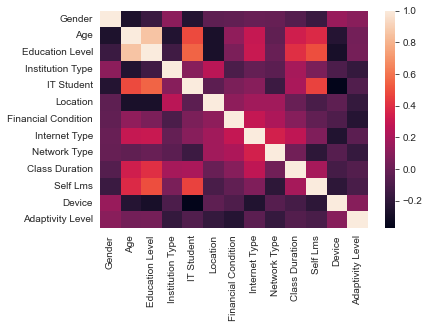

In [22]:
sns.heatmap(data2.astype(int).corr())

我们可以看到，除了对角线以外，几乎所有格子都为浅色，说明相关系数极低。一方面可能因为这些变量之间的关联较小，但另一方面，这里使用相关系数并不合适。相关系数研究的是两个变量之间的线性相关性，但是此处每一个变量都只有2至3种选项，所以变量之间几乎无法构成线性关系，所以相关系数较低。

所以接下来，我们将分别研究各个变量，来得出最终的结果。

# 2. 数据分析

## (1) 不同因素的数据分布情况

学生对网课自适应性分布

In [23]:
Adaptivity = data.groupby('Adaptivity Level')['Adaptivity Level'].count()
Adaptivity = Adaptivity.reindex(adpt)
print(Adaptivity)

Adaptivity Level
High        100
Moderate    615
Low         336
Name: Adaptivity Level, dtype: int64


总体来说，被调查者对自己的网课适应程度的满意程度中等偏下。大部分为中等水平，较符合正态分布。

学生性别分布

In [24]:
Gender = data.groupby('Gender')['Gender'].count()
print(Gender)

Gender
Boy     576
Girl    475
Name: Gender, dtype: int64


在被调查者中，男性居多。

学生年龄分布

In [25]:
Age = data.groupby('Age')['Age'].count()
print(Age)

Age
1-5       78
11-15    319
16-20    244
21-25    328
26-30     45
6-10      37
Name: Age, dtype: int64


学生教育水平分布

In [26]:
Education = data.groupby('Education Level')['Education Level'].count()
print(Education)

Education Level
College       188
School        466
University    397
Name: Education Level, dtype: int64


被调查者大多数为中小学学生或综合性大学学生。

所在学校是否属于政府

In [27]:
Government = data.groupby('Institution Type')['Institution Type'].count()
print(Government)

Institution Type
Government        274
Non Government    777
Name: Institution Type, dtype: int64


大多数被调查者来自于非公立学校。

学生是否为IT学生

In [28]:
IT = data.groupby('IT Student')['IT Student'].count()
print(IT)

IT Student
No     763
Yes    288
Name: IT Student, dtype: int64


大多数被调查者非计算机相关学生。

学生居住处分布(Yes指城市)

In [29]:
Town = data.groupby('Location')['Location'].count()
print(Town)

Location
No     185
Yes    866
Name: Location, dtype: int64


大多数被调查者为城市学生。

学生经济状况分布

In [30]:
Finance = data.groupby('Financial Condition')['Financial Condition'].count()
print(Finance)

Financial Condition
Mid     764
Poor    204
Rich     83
Name: Financial Condition, dtype: int64


大多数被调查者经济水平为中等，较多被调查者为穷困。

学生上课网络类型分布

In [31]:
Internet = data.groupby('Internet Type')['Internet Type'].count()
print(Internet)

Internet Type
Mobile Data    586
Wifi           465
Name: Internet Type, dtype: int64


较多被调查者使用移动网络上课。

学生网络连接类型分布

In [32]:
Network = data.groupby('Network Type')['Network Type'].count()
print(Network)

Network Type
2G     17
3G    368
4G    666
Name: Network Type, dtype: int64


较多被调查者使用4G.

课程时长分布

In [33]:
Duration = data.groupby('Class Duration')['Class Duration'].count()
print(Duration)

Class Duration
1-3    840
3-6    211
Name: Class Duration, dtype: int64


较多被调查者课程时长为1-3小时。

学校是否有自己的学习系统

In [34]:
LMS = data.groupby('Self Lms')['Self Lms'].count()
print(LMS)

Self Lms
No     843
Yes    208
Name: Self Lms, dtype: int64


较多被调查者的学校没有学习系统。

学生使用的设备分布

In [35]:
Device = data.groupby('Device')['Device'].count()
print(Device)

Device
Computer    156
Mobile      865
Tab          30
Name: Device, dtype: int64


大多数被调查者使用移动设备。

## (2) 学生自适应性与不同因素之间的关系

接下来所有数据都将按照自适应性程度从高到低进行排序。

In [36]:
Order = ['High', 'Moderate', 'Low']

自适应程度与性别的关系

In [37]:
# Gender_Adapt = data.loc[data['Adaptivity Level'] == 'High'].groupby('Gender')['Adaptivity Level'].count()
Gender_Adapt = data.groupby(['Gender', 'Adaptivity Level'])['Adaptivity Level'].count()
Gender_Adapt = Gender_Adapt.reindex(Order, level='Adaptivity Level')
print(Gender_Adapt)

Gender  Adaptivity Level
Boy     High                 71
        Moderate            337
        Low                 168
Girl    High                 29
        Moderate            278
        Low                 168
Name: Adaptivity Level, dtype: int64


自适应程度与年龄的关系

In [38]:
Age_Adapt = data.groupby(['Age', 'Adaptivity Level'])['Adaptivity Level'].count()
Age_Adapt = Age_Adapt.reindex(Order, level='Adaptivity Level')
Age_Adapt = Age_Adapt.reindex(age, level='Age')
print(Age_Adapt)

Age    Adaptivity Level
1-5    Moderate             64
       Low                  14
6-10   High                 17
       Moderate             10
       Low                  10
11-15  High                 28
       Moderate            205
       Low                  86
16-20  High                  5
       Moderate            127
       Low                 112
21-25  High                 38
       Moderate            189
       Low                 101
26-30  High                 12
       Moderate             20
       Low                  13
Name: Adaptivity Level, dtype: int64


自适应程度与教育程度的关系

In [39]:
Education_Adapt = data.groupby(['Education Level', 'Adaptivity Level'])['Adaptivity Level'].count()
Education_Adapt = Education_Adapt.reindex(Order, level='Adaptivity Level')
Education_Adapt = Education_Adapt.reindex(education, level='Education Level')
print(Education_Adapt)

Education Level  Adaptivity Level
School           High                 47
                 Moderate            301
                 Low                 118
College          High                  3
                 Moderate             94
                 Low                  91
University       High                 50
                 Moderate            220
                 Low                 127
Name: Adaptivity Level, dtype: int64


自适应程度与学院性质的关系

In [40]:
Government_Adapt = data.groupby(['Institution Type', 'Adaptivity Level'])['Adaptivity Level'].count()
Government_Adapt = Government_Adapt.reindex(Order, level='Adaptivity Level')
print(Government_Adapt)

Institution Type  Adaptivity Level
Government        High                 20
                  Moderate            122
                  Low                 132
Non Government    High                 80
                  Moderate            493
                  Low                 204
Name: Adaptivity Level, dtype: int64


自适应程度与学生是否学习计算机的关系

In [41]:
IT_Adapt = data.groupby(['IT Student', 'Adaptivity Level'])['Adaptivity Level'].count()
IT_Adapt = IT_Adapt.reindex(Order, level='Adaptivity Level')
print(IT_Adapt)

IT Student  Adaptivity Level
No          High                 67
            Moderate            435
            Low                 261
Yes         High                 33
            Moderate            180
            Low                  75
Name: Adaptivity Level, dtype: int64


自适应程度与学生居住地的关系

In [42]:
Location_Adapt = data.groupby(['Location', 'Adaptivity Level'])['Adaptivity Level'].count()
Location_Adapt = Location_Adapt.reindex(Order, level='Adaptivity Level')
print(Location_Adapt)

Location  Adaptivity Level
No        High                  8
          Moderate             83
          Low                  94
Yes       High                 92
          Moderate            532
          Low                 242
Name: Adaptivity Level, dtype: int64


自适应程度与经济情况的关系

In [43]:
Finance_Adapt = data.groupby(['Financial Condition', 'Adaptivity Level'])['Adaptivity Level'].count()
Finance_Adapt = Finance_Adapt.reindex(Order, level='Adaptivity Level')
Finance_Adapt = Finance_Adapt.reindex(finance, level='Financial Condition')
print(Finance_Adapt)

Financial Condition  Adaptivity Level
Poor                 High                 22
                     Moderate             91
                     Low                  91
Mid                  High                 36
                     Moderate            491
                     Low                 237
Rich                 High                 42
                     Moderate             33
                     Low                   8
Name: Adaptivity Level, dtype: int64


自适应程度与网络类型的关系

In [44]:
Internet_Adapt = data.groupby(['Internet Type', 'Adaptivity Level'])['Adaptivity Level'].count()
Internet_Adapt = Internet_Adapt.reindex(Order, level='Adaptivity Level')
print(Internet_Adapt)

Internet Type  Adaptivity Level
Mobile Data    High                 36
               Moderate            367
               Low                 183
Wifi           High                 64
               Moderate            248
               Low                 153
Name: Adaptivity Level, dtype: int64


自适应程度与网络连接的关系

In [45]:
Network_Adapt = data.groupby(['Network Type', 'Adaptivity Level'])['Adaptivity Level'].count()
Network_Adapt = Network_Adapt.reindex(Order, level='Adaptivity Level')
print(Network_Adapt)

Network Type  Adaptivity Level
2G            Moderate              3
              Low                  14
3G            High                 22
              Moderate            203
              Low                 143
4G            High                 78
              Moderate            409
              Low                 179
Name: Adaptivity Level, dtype: int64


自适应程度与课程时长的关系

In [46]:
Duration_Adapt = data.groupby(['Class Duration', 'Adaptivity Level'])['Adaptivity Level'].count()
Duration_Adapt = Duration_Adapt.reindex(Order, level='Adaptivity Level')
print(Duration_Adapt)

Class Duration  Adaptivity Level
1-3             High                 82
                Moderate            468
                Low                 290
3-6             High                 18
                Moderate            147
                Low                  46
Name: Adaptivity Level, dtype: int64


自适应程度与学校是否有学习系统的关系

In [47]:
LMS_Adapt = data.groupby(['Self Lms', 'Adaptivity Level'])['Adaptivity Level'].count()
LMS_Adapt = LMS_Adapt.reindex(Order, level='Adaptivity Level')
print(LMS_Adapt)

Self Lms  Adaptivity Level
No        High                 70
          Moderate            487
          Low                 286
Yes       High                 30
          Moderate            128
          Low                  50
Name: Adaptivity Level, dtype: int64


自适应程度与设备的关系

In [48]:
Device_Adapt = data.groupby(['Device', 'Adaptivity Level'])['Adaptivity Level'].count()
Device_Adapt = Device_Adapt.reindex(Order, level='Adaptivity Level')
print(Device_Adapt)

Device    Adaptivity Level
Computer  High                 30
          Moderate             92
          Low                  34
Mobile    High                 68
          Moderate            497
          Low                 300
Tab       High                  2
          Moderate             26
          Low                   2
Name: Adaptivity Level, dtype: int64


## (3) 数据可视化

由于此处难以控制变量，所以通过比例的方式来反映一个变量的影响程度。

同时，我们在研究过程中主要比较高适应性与低适应性。

In [49]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
font = {'family':'STZhongSong', 'size':16}

显示学生自适应总体情况

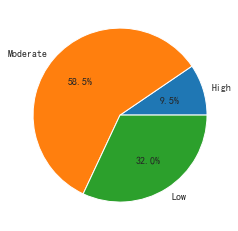

In [50]:
plt.pie(Adaptivity, labels=Order, autopct='%.1f%%')
plt.show()

性别

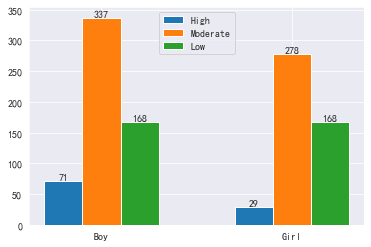

In [51]:
high = [Gender_Adapt['Boy']['High'], Gender_Adapt['Girl']['High']]
moderate = [Gender_Adapt['Boy']['Moderate'], Gender_Adapt['Girl']['Moderate']]
low = [Gender_Adapt['Boy']['Low'], Gender_Adapt['Girl']['Low']]


count = Gender.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x+width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i]+width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x+2*width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i]+2*width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x+width, labels=gender)
plt.legend(loc='upper center')
plt.show()


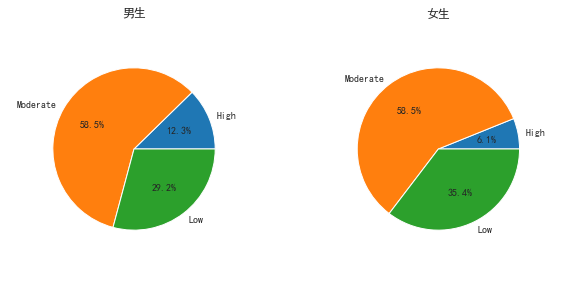

In [52]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
boy = [Gender_Adapt['Boy']['High'], Gender_Adapt['Boy']['Moderate'], Gender_Adapt['Boy']['Low']]
plt.pie(boy, labels=Order, autopct='%1.1f%%', radius=0.8)
plt.title("男生")


plt.subplot(122)
girl = [Gender_Adapt['Girl']['High'], Gender_Adapt['Girl']['Moderate'], Gender_Adapt['Girl']['Low']]
plt.pie(girl, labels=Order, autopct='%1.1f%%', radius=0.8)
plt.title("女生")

plt.show()

通过以上饼图可以发现女生大多数都处于中等自适应性。而男生有较大的比例有较高的自适应性，女生有较大的比例有较低的自适应性。

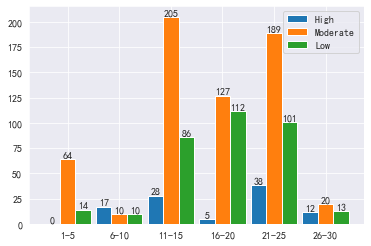

In [53]:
high = [0, Age_Adapt['6-10']['High'], Age_Adapt['11-15']['High'], Age_Adapt['16-20']['High'],
        Age_Adapt['21-25']['High'], Age_Adapt['26-30']['High']]
moderate = [Age_Adapt['1-5']['Moderate'], Age_Adapt['6-10']['Moderate'], Age_Adapt['11-15']['Moderate'], Age_Adapt['16-20']['Moderate'],
            Age_Adapt['21-25']['Moderate'], Age_Adapt['26-30']['Moderate']]
low = [Age_Adapt['1-5']['Low'], Age_Adapt['6-10']['Low'], Age_Adapt['11-15']['Low'], Age_Adapt['16-20']['Low'],
       Age_Adapt['21-25']['Low'], Age_Adapt['26-30']['Low']]


count = Age.count()
width = 0.3
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x+width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i]+width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x+2*width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i]+2*width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x+width, labels=age)
plt.legend()
plt.show()

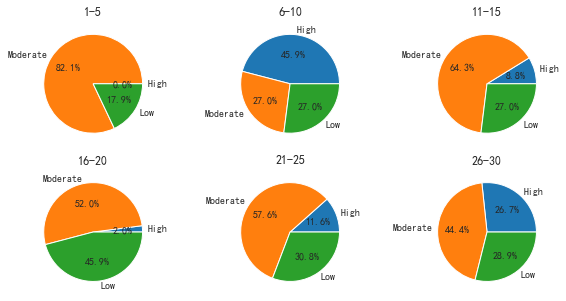

In [54]:
age1 = [0, Age_Adapt['1-5']['Moderate'], Age_Adapt['1-5']['Low']]
age2 = [Age_Adapt['6-10']['High'], Age_Adapt['6-10']['Moderate'], Age_Adapt['6-10']['Low']]
age3 = [Age_Adapt['11-15']['High'], Age_Adapt['11-15']['Moderate'], Age_Adapt['11-15']['Low']]
age4 = [Age_Adapt['16-20']['High'], Age_Adapt['16-20']['Moderate'], Age_Adapt['16-20']['Low']]
age5 = [Age_Adapt['21-25']['High'], Age_Adapt['21-25']['Moderate'], Age_Adapt['21-25']['Low']]
age6 = [Age_Adapt['26-30']['High'], Age_Adapt['26-30']['Moderate'], Age_Adapt['26-30']['Low']]

plt.figure(figsize=(10, 5))

plt.subplot(231)
plt.pie(age1, labels=Order, autopct='%1.1f%%')
plt.title('1-5')


plt.subplot(232)
plt.pie(age2, labels=Order, autopct='%1.1f%%')
plt.title('6-10')


plt.subplot(233)
plt.pie(age3, labels=Order, autopct='%1.1f%%')
plt.title('11-15')


plt.subplot(234)
plt.pie(age4, labels=Order, autopct='%1.1f%%')
plt.title('16-20')


plt.subplot(235)
plt.pie(age5, labels=Order, autopct='%1.1f%%')
plt.title('21-25')


plt.subplot(236)
plt.pie(age6, labels=Order, autopct='%1.1f%%')
plt.title('26-30')


plt.show()

如果只是从饼图显示的比例来看，6-10岁的小朋友对于网课的自适应性最强，其次是26-30。在学生达到16岁后，自适应程度随着年龄的增长而不断增强。

可能的原因如下：
- 6-10岁小朋友刚刚正式进入学校学习，他们并没有自己的学习习惯，而线上学习对于他们来说是第一种学习方式，同时他们对于网课这类新奇的事物感到好奇，所以对于网课有一定的适应性。
- 成年以后，人们的心智也在不断地成熟，对于新事物的学习能力也较强，在线下线上转换的过程中，年龄较大者因较多的社会阅历，他们能够更加容易地接受新的事物。
- 观察柱状图，可以发现1-10岁学生的数据较少，所以这里的数据可能并不能反映整体的情况。在增加一定的数据量后，可能6-10岁的高适应性比例会下降。与此同时，11-25岁的数据较为充足，可以显示出16-20岁的学生对于网课并没有很强的适应性，而这个年龄段恰好是高中和大学本科的年龄段。

学历层次

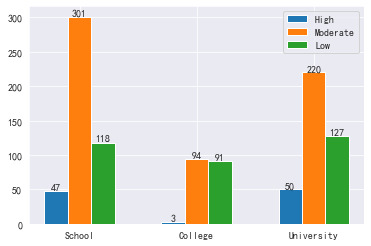

In [55]:
high = [Education_Adapt['School']['High'], Education_Adapt['College']['High'], Education_Adapt['University']['High']]
moderate = [Education_Adapt['School']['Moderate'], Education_Adapt['College']['Moderate'], Education_Adapt['University']['Moderate']]
low = [Education_Adapt['School']['Low'], Education_Adapt['College']['Low'], Education_Adapt['University']['Low']]


count = Education.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x+width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i]+width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x+2*width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i]+2*width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x+width, labels=education)
plt.legend()
plt.show()

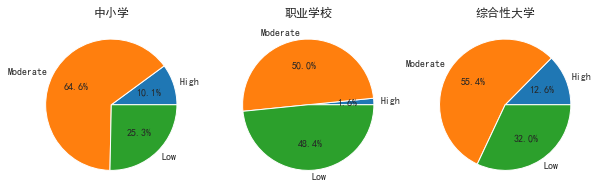

In [56]:
plt.figure(figsize=(10, 10))
plt.subplot(131)
school = [Education_Adapt['School']['High'], Education_Adapt['School']['Moderate'], Education_Adapt['School']['Low']]
plt.pie(school, labels=Order, autopct='%1.1f%%')
plt.title("中小学")


plt.subplot(132)
college = [Education_Adapt['College']['High'], Education_Adapt['College']['Moderate'], Education_Adapt['College']['Low']]
plt.pie(college, labels=Order, autopct='%1.1f%%')
plt.title("职业学校")


plt.subplot(133)
university = [Education_Adapt['University']['High'], Education_Adapt['University']['Moderate'], Education_Adapt['University']['Low']]
plt.pie(university, labels=Order, autopct='%1.1f%%')
plt.title("综合性大学")
plt.show()

通过这张饼图，可以发现职业学校的学生的低适应性是最明显的，几乎占到了总数的一半。

接下来，比较中小学学生和综合性大学学生。在高适应性学生中，综合性大学学生比例略大于中小学学生比例。但是看到低适应性比例后，可以发现综合性大学学生比例远大于中小学学生比例。这里我们可以得到一个小结论，总体来看，中小学生网课总体适应性是高于综合性大学的。这与之前分析的年龄因素有一定的吻合之处。我们可以看到16-20岁的学生低适应性的比例是极大的，而这恰好是高中到大学的过渡时期。所以这里很难断定是因为年龄还是学历层次引起的差异。


学院性质

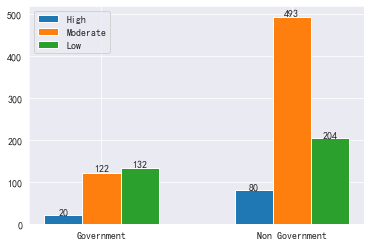

In [57]:
high = [Government_Adapt['Government']['High'], Government_Adapt['Non Government']['High']]
moderate = [Government_Adapt['Government']['Moderate'], Government_Adapt['Non Government']['Moderate']]
low = [Government_Adapt['Government']['Low'], Government_Adapt['Non Government']['Low']]


count = Government.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x+width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i]+width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x+2*width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i]+2*width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x+width, labels=institution)
plt.legend()
plt.show()

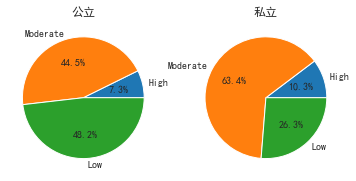

In [58]:
plt.subplot(121)
gov = [Government_Adapt['Government']['High'], Government_Adapt['Government']['Moderate'], Government_Adapt['Government']['Low']]
plt.pie(gov, labels=Order, autopct='%1.1f%%')
plt.title("公立")


plt.subplot(122)
ngov = [Government_Adapt['Non Government']['High'], Government_Adapt['Non Government']['Moderate'], Government_Adapt['Non Government']['Low']]
plt.pie(ngov, labels=Order, autopct='%1.1f%%')
plt.title("私立")

plt.show()

从这张图中我们可以看出公立学校学生低适应性比例是较大的，且高适应性比例是较小的，可见公立学校学生总体网课适应性是较低的。

是否为计算机学生

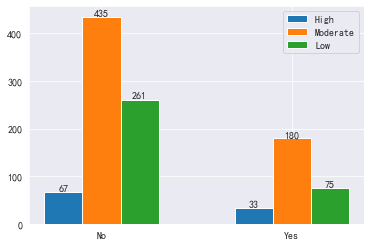

In [59]:
high = [IT_Adapt['No']['High'], IT_Adapt['Yes']['High']]
moderate = [IT_Adapt['No']['Moderate'], IT_Adapt['Yes']['Moderate']]
low = [IT_Adapt['No']['Low'], IT_Adapt['Yes']['Low']]


count = IT.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x + width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i] + width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x + 2 * width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i] + 2 * width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x + width, labels=it)
plt.legend()
plt.show()

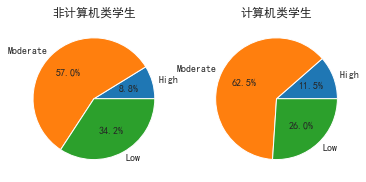

In [60]:
plt.subplot(121)
no = [IT_Adapt['No']['High'], IT_Adapt['No']['Moderate'], IT_Adapt['No']['Low']]
plt.pie(no, labels=Order, autopct='%1.1f%%')
plt.title("非计算机类学生")


plt.subplot(122)
yes = [IT_Adapt['Yes']['High'], IT_Adapt['Yes']['Moderate'], IT_Adapt['Yes']['Low']]
plt.pie(yes, labels=Order, autopct='%1.1f%%')
plt.title("计算机类学生")

plt.show()

从这张图中可以看出计算机相关学生的高适应性比例较大，且低适应性比例较小。而这一点其实可以理解，计算机类的学生与电脑等智能设备接触更密切，且研究的都是较深的计算机知识，所以他们可以较快地掌握网课所需的一些技能，从而能够更好的适应网课的环境。从网课适应性的角度出发，我们也能看到一些差距。非计算机类学生相比于计算机类学生难以适应网课的现象较为普遍。可能的原因有非计算机类学生的计算机能力教育较为薄弱，学生也很难自己去学习相关的知识，同时，他们也会认为这样的能力对于他们来说意义不大，从而不去主动学习相应的知识。所以，对于计算机教育的普及尤为重要，在网课期间，它的重要性也有所体现，所有人都应该重视计算机能力，顺应这个时代，掌握这个时代所必须的知识和技能。

居住地点

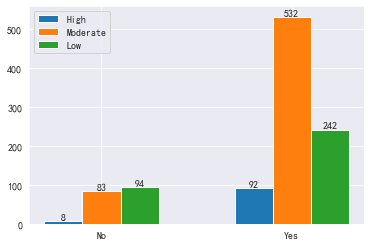

In [61]:
high = [Location_Adapt['No']['High'], Location_Adapt['Yes']['High']]
moderate = [Location_Adapt['No']['Moderate'], Location_Adapt['Yes']['Moderate']]
low = [Location_Adapt['No']['Low'], Location_Adapt['Yes']['Low']]


count = Town.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x + width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i] + width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x + 2 * width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i] + 2 * width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x + width, labels=location)
plt.legend()
plt.show()

从中我们可以看到被调查者中城市学生远多于乡村学生

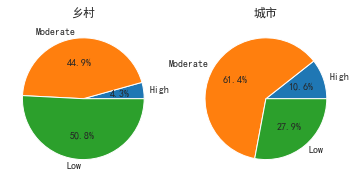

In [62]:
plt.subplot(121)
no = [Location_Adapt['No']['High'], Location_Adapt['No']['Moderate'], Location_Adapt['No']['Low']]
plt.pie(no, labels=Order, autopct='%1.1f%%')
plt.title("乡村")


plt.subplot(122)
yes = [Location_Adapt['Yes']['High'], Location_Adapt['Yes']['Moderate'], Location_Adapt['Yes']['Low']]
plt.pie(yes, labels=Order, autopct='%1.1f%%')
plt.title("城市")

plt.show()

从上图中可以看出，城市学生网课适应程度略高于乡村学生网课适应程度，而原因将在后文分析。

经济状况

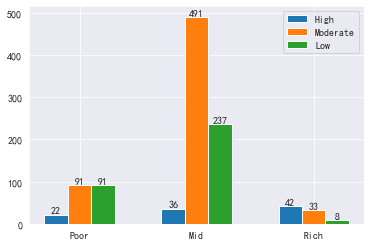

In [63]:
high = [Finance_Adapt['Poor']['High'], Finance_Adapt['Mid']['High'], Finance_Adapt['Rich']['High']]
moderate = [Finance_Adapt['Poor']['Moderate'], Finance_Adapt['Mid']['Moderate'], Finance_Adapt['Rich']['Moderate']]
low = [Finance_Adapt['Poor']['Low'], Finance_Adapt['Mid']['Low'], Finance_Adapt['Rich']['Low']]


count = Finance.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x+width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i]+width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x+2*width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i]+2*width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x+width, labels=finance)
plt.legend()
plt.show()

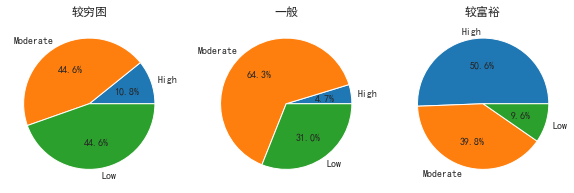

In [64]:
plt.figure(figsize=(10, 10))
plt.subplot(131)
poor = [Finance_Adapt['Poor']['High'], Finance_Adapt['Poor']['Moderate'], Finance_Adapt['Poor']['Low']]
plt.pie(poor, labels=Order, autopct='%1.1f%%')
plt.title("较穷困")


plt.subplot(132)
mid = [Finance_Adapt['Mid']['High'], Finance_Adapt['Mid']['Moderate'], Finance_Adapt['Mid']['Low']]
plt.pie(mid, labels=Order, autopct='%1.1f%%')
plt.title("一般")


plt.subplot(133)
rich = [Finance_Adapt['Rich']['High'], Finance_Adapt['Rich']['Moderate'], Finance_Adapt['Rich']['Low']]
plt.pie(rich, labels=Order, autopct='%1.1f%%')
plt.title("较富裕")
plt.show()

在这张图中，我们重点分析贫困学生和富裕学生的差异。这两类学生的数据量较小，所以结论并不准确。但是从这些数据中，我们仍然能看出一定的贫富差距。富裕学生中高适应性学生的比例超过了一般，而贫困学生的低适应比例将近一半。可见家庭经济情况在一定程度上也可以影响学习状态。

网络连接

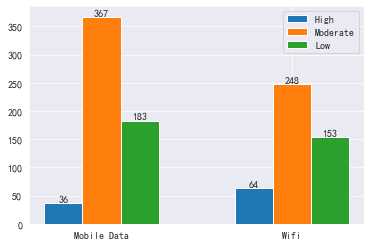

In [65]:
high = [Internet_Adapt['Mobile Data']['High'], Internet_Adapt['Wifi']['High']]
moderate = [Internet_Adapt['Mobile Data']['Moderate'], Internet_Adapt['Wifi']['Moderate']]
low = [Internet_Adapt['Mobile Data']['Low'], Internet_Adapt['Wifi']['Low']]


count = Internet.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x + width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i] + width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x + 2 * width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i] + 2 * width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x + width, labels=internet)
plt.legend()
plt.show()

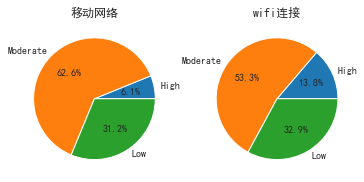

In [66]:
plt.subplot(121)
mobile = [Internet_Adapt['Mobile Data']['High'], Internet_Adapt['Mobile Data']['Moderate'], Internet_Adapt['Mobile Data']['Low']]
plt.pie(mobile, labels=Order, autopct='%1.1f%%')
plt.title("移动网络")


plt.subplot(122)
wifi = [Internet_Adapt['Wifi']['High'], Internet_Adapt['Wifi']['Moderate'], Internet_Adapt['Wifi']['Low']]
plt.pie(wifi, labels=Order, autopct='%1.1f%%')
plt.title("wifi连接")

plt.show()

上图中可以看出使用wifi的学生对于网课具有较高的适应性，而使用移动网络与wifi的学生中低适应性比例相当。

网络类型

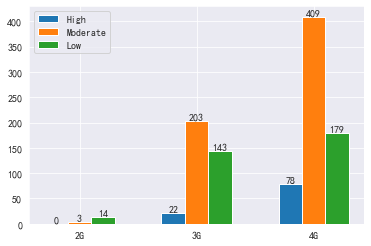

In [67]:
high = [0, Network_Adapt['3G']['High'], Network_Adapt['4G']['High']]
moderate = [Network_Adapt['2G']['Moderate'], Network_Adapt['3G']['Moderate'], Network_Adapt['4G']['Moderate']]
low = [Network_Adapt['2G']['Low'], Network_Adapt['3G']['Low'], Network_Adapt['4G']['Low']]


count = Network.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x+width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i]+width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x+2*width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i]+2*width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x+width, labels=network)
plt.legend()
plt.show()

从中可以看出，2G网络几乎不存在了，3G，4G网络的普及率较好。

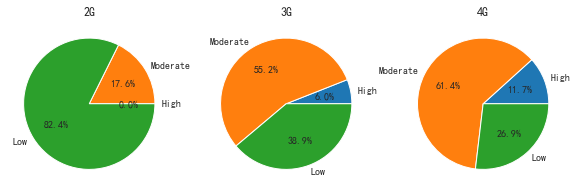

In [68]:
plt.figure(figsize=(10, 10))
plt.subplot(131)
g2 = [0, Network_Adapt['2G']['Moderate'], Network_Adapt['2G']['Low']]
plt.pie(g2, labels=Order, autopct='%1.1f%%')
plt.title("2G")


plt.subplot(132)
g3 = [Network_Adapt['3G']['High'], Network_Adapt['3G']['Moderate'], Network_Adapt['3G']['Low']]
plt.pie(g3, labels=Order, autopct='%1.1f%%')
plt.title("3G")


plt.subplot(133)
g4 = [Network_Adapt['4G']['High'], Network_Adapt['4G']['Moderate'], Network_Adapt['4G']['Low']]
plt.pie(g4, labels=Order, autopct='%1.1f%%')
plt.title("4G")
plt.show()

从上图中我们可以看出网速对此起到重要的作用。
使用4G网络的学生与使用3G网络的学生相比，中高适应比例较大，低适应比例较小，而使用2G网络的学生中没有高适应的学生，且低适应学生占到80%之多。

课程时长

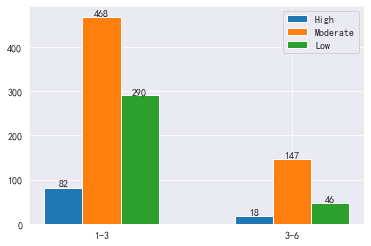

In [69]:
high = [Duration_Adapt['1-3']['High'], Duration_Adapt['3-6']['High']]
moderate = [Duration_Adapt['1-3']['Moderate'], Duration_Adapt['3-6']['Moderate']]
low = [Duration_Adapt['1-3']['Low'], Duration_Adapt['3-6']['Low']]


count = Duration.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x+width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i]+width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x+2*width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i]+2*width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x+width, labels=duration)
plt.legend()
plt.show()

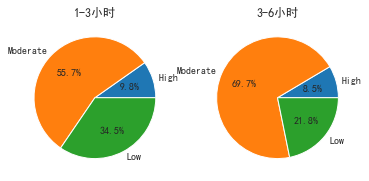

In [70]:
plt.subplot(121)
short = [Duration_Adapt['1-3']['High'], Duration_Adapt['1-3']['Moderate'], Duration_Adapt['1-3']['Low']]
plt.pie(short, labels=Order, autopct='%1.1f%%')
plt.title("1-3小时")


plt.subplot(122)
long = [Duration_Adapt['3-6']['High'], Duration_Adapt['3-6']['Moderate'], Duration_Adapt['3-6']['Low']]
plt.pie(long, labels=Order, autopct='%1.1f%%')
plt.title("3-6小时")

plt.show()

从上图中可以看出，不论课程时间长短，高适应性学生比例接近，但是课程时间短的学生中低适应性的比例较高。

是否有学习系统

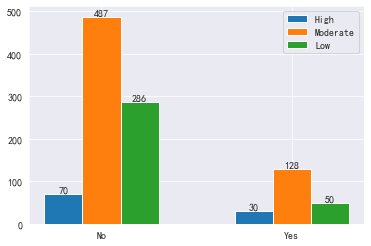

In [71]:
high = [LMS_Adapt['No']['High'], LMS_Adapt['Yes']['High']]
moderate = [LMS_Adapt['No']['Moderate'], LMS_Adapt['Yes']['Moderate']]
low = [LMS_Adapt['No']['Low'], LMS_Adapt['Yes']['Low']]


count = Internet.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x + width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i] + width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x + 2 * width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i] + 2 * width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x + width, labels=lms)
plt.legend()
plt.show()

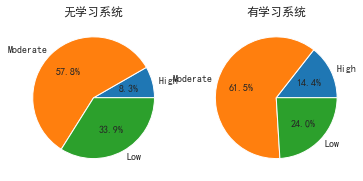

In [72]:
plt.subplot(121)
no = [LMS_Adapt['No']['High'], LMS_Adapt['No']['Moderate'], LMS_Adapt['No']['Low']]
plt.pie(no, labels=Order, autopct='%1.1f%%')
plt.title("无学习系统")


plt.subplot(122)
yes = [LMS_Adapt['Yes']['High'], LMS_Adapt['Yes']['Moderate'], LMS_Adapt['Yes']['Low']]
plt.pie(yes, labels=Order, autopct='%1.1f%%')
plt.title("有学习系统")

plt.show()

从上图中可以看出学校有自主的学习系统可以一定程度上提升学生自适应性。有学习系统的学生低适应性比例也较低。

偏好设备

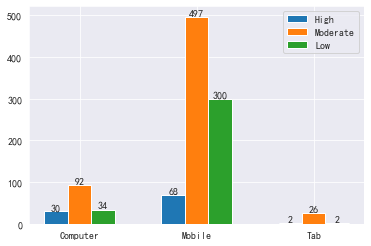

In [73]:
high = [Device_Adapt['Computer']['High'], Device_Adapt['Mobile']['High'], Device_Adapt['Tab']['High']]
moderate = [Device_Adapt['Computer']['Moderate'], Device_Adapt['Mobile']['Moderate'], Device_Adapt['Tab']['Moderate']]
low = [Device_Adapt['Computer']['Low'], Device_Adapt['Mobile']['Low'], Device_Adapt['Tab']['Low']]


count = Finance.count()
width = 0.2
x = np.arange(count)
plt.bar(x, high, width=width, label='High')
for i in range(count):
    plt.text(x[i], high[i], high[i], va='bottom', ha='center')
plt.bar(x+width, moderate, width=width, label='Moderate')
for i in range(count):
    plt.text(x[i]+width, moderate[i], moderate[i], va='bottom', ha='center')
plt.bar(x+2*width, low, width=width, label='Low')
for i in range(count):
    plt.text(x[i]+2*width, low[i], low[i], va='bottom', ha='center')
plt.xticks(x+width, labels=device)
plt.legend()
plt.show()

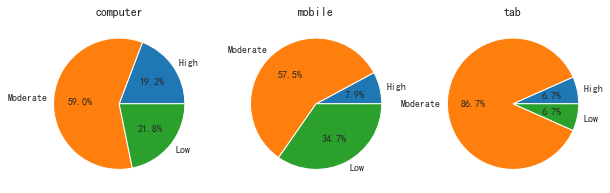

In [74]:
plt.figure(figsize=(10, 10))
plt.subplot(131)
computer = [Device_Adapt['Computer']['High'], Device_Adapt['Computer']['Moderate'], Device_Adapt['Computer']['Low']]
plt.pie(computer, labels=Order, autopct='%1.1f%%')
plt.title("computer")


plt.subplot(132)
mobile = [Device_Adapt['Mobile']['High'], Device_Adapt['Mobile']['Moderate'], Device_Adapt['Mobile']['Low']]
plt.pie(mobile, labels=Order, autopct='%1.1f%%')
plt.title("mobile")


plt.subplot(133)
tab = [Device_Adapt['Tab']['High'], Device_Adapt['Tab']['Moderate'], Device_Adapt['Tab']['Low']]
plt.pie(tab, labels=Order, autopct='%1.1f%%')
plt.title("tab")
plt.show()

使用tab的同学数据量过少，所以不做分析。可以看到使用电脑的同学高适应比例较高，同时低适应比例较低。

## (4) 分析不同因素之间的关系

之前的分析都基于学生网课自适应性程度和单一因素之间的关系。但是不可否认的是，不同因素之间也会有关系，而它们之间的相互影响可能会导致最终对自适应性的判断。在之前的分析中，我们也遇到了一些与我们平时的观念相悖的结果，所以有必要对于这些现象作出分析。接下来将进行因素之间关系的分析。

### 居住地，经济水平，网络连接之间的关系

经济情况与居住地之间的关系

In [75]:
Finance = data.groupby(['Location', 'Financial Condition'])['Financial Condition'].count()
Finance = Finance.reindex(['Poor', 'Mid', 'Rich'], level='Financial Condition')
Finance

Location  Financial Condition
No        Poor                    47
          Mid                    136
          Rich                     2
Yes       Poor                   157
          Mid                    628
          Rich                    81
Name: Financial Condition, dtype: int64

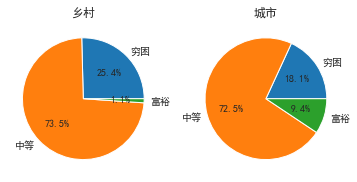

In [76]:
rural = [Finance['No']['Poor'], Finance['No']['Mid'], Finance['No']['Rich']]
city = [Finance['Yes']['Poor'], Finance['Yes']['Mid'], Finance['Yes']['Rich']]
plt.subplot(121)
plt.pie(rural, labels=['穷困', '中等', '富裕'], autopct='%1.1f%%')
plt.title("乡村")


plt.subplot(122)
plt.pie(city, labels=['穷困', '中等', '富裕'], autopct='%1.1f%%')
plt.title("城市")
plt.show()

从上述图形中可以看出，乡村穷困率较高，且富裕率几乎为0. 而根据之前的分析，居住在城市的学生，高适应性比例较大；经济水平较为富裕的学生，高适应性比例较大。这里体现了居住地与经济水平之间的关系。我们可以看到它符合我们的一般认知，所以城乡之间的经济水平差异仍然存在，而教育是需要经费投入的，所以加强对乡村经济的发展是至关重要的，这也是乡村里的孩子能受到高质量教育的物质基础，也是实现教育公平的基础。

网络连接与居住地之间的关系

In [77]:
Internet = data.groupby(['Location', 'Internet Type'])['Internet Type'].count()
Internet

Location  Internet Type
No        Mobile Data      138
          Wifi              47
Yes       Mobile Data      448
          Wifi             418
Name: Internet Type, dtype: int64

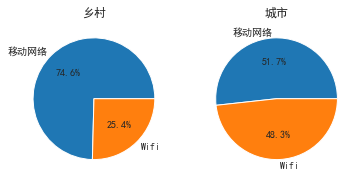

In [78]:
rural = [Internet['No']['Mobile Data'], Internet['No']['Wifi']]
city = [Internet['Yes']['Mobile Data'], Internet['Yes']['Wifi']]
plt.subplot(121)
plt.pie(rural, labels=['移动网络', 'Wifi'], autopct='%1.1f%%')
plt.title("乡村")


plt.subplot(122)
plt.pie(city, labels=['移动网络', 'Wifi'], autopct='%1.1f%%')
plt.title("城市")
plt.show()

从中我们可以看出被调查者中，乡村学生使用wifi的比例小于城市的使用wifi比例。说明在当时孟加拉国城乡之间网络差异也较为明显，而在之前的分析中可以看到这一因素主要影响高适应性比例，而低适应性比例较为接近。所以，网络连接较大程度上影响学生适应程度的上限。

网络类型与居住地之间的关系

In [79]:
Network = data.groupby(['Location', 'Network Type'])['Network Type'].count()
Network

Location  Network Type
No        2G               12
          3G               83
          4G               90
Yes       2G                5
          3G              285
          4G              576
Name: Network Type, dtype: int64

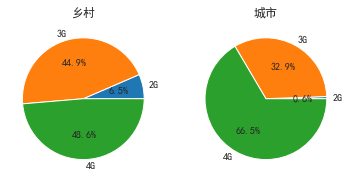

In [80]:
rural = [Network['No']['2G'], Network['No']['3G'], Network['No']['4G']]
city = [Network['Yes']['2G'], Network['Yes']['3G'], Network['Yes']['4G']]
plt.subplot(121)
plt.pie(rural, labels=['2G', '3G', '4G'], autopct='%1.1f%%')
plt.title("乡村")


plt.subplot(122)
plt.pie(city, labels=['2G', '3G', '4G'], autopct='%1.1f%%')
plt.title("城市")
plt.show()

从上述图表中我们可以看到城市学生使用4G的比例远高于乡村，与此同时城市学生几乎不使用2G，而根据之前的分析，网络类型同时影响着高适应性比例和低适应性比例。

从网络连接，网络类型与居住地之间的关系分析结果来看，城市的网络普及率以及网速都要好于乡村，虽然这些数据还不足以支撑这一结论，但是足以反映一些显示问题。
- 网络作为老师和学生线上教学沟通的重要媒介，自然也就影响着学生的学习情况。优质的网络可以为学生提供一个良好的听课环境，从而使学生可以更加快地适应线上上课环境。
- 乡村的网络普及率与网速和城市相比仍然有较大的提升空间。在线上学习期间，乡村学生被迫承受这样的差距。
- 虽然不管使移动网络还是wifi，学生低适应比例相近，但是使用wifi的学生高适应性比例明显高于使用移动网络的学生，这也是教育资源不公平的一种体现，较贫困的学生难以得到最好的教育资源。

综上，城乡之间的差距仍然存在，在经济情况和网络情况上都有体现，而这些差异在教育水平差异上也有所体现。所以要改变教育现状，提升教育公平，缩小城乡之间的差距，改善乡村生活环境是极为重要的。

学历层次与家庭经济情况的关系

In [81]:
Edu_Fin = data.groupby(['Financial Condition', 'Education Level'])['Education Level'].count()
Edu_Fin = Edu_Fin.reindex(['Poor', 'Mid', 'Rich'], level='Financial Condition')
Edu_Fin

Financial Condition  Education Level
Poor                 College             12
                     School             124
                     University          68
Mid                  College            176
                     School             291
                     University         297
Rich                 School              51
                     University          32
Name: Education Level, dtype: int64

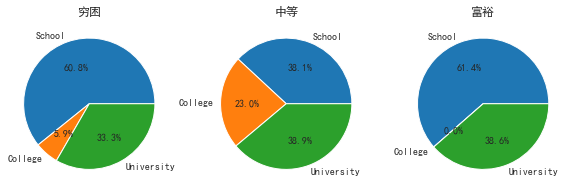

In [82]:
poor = [Edu_Fin['Poor']['School'], Edu_Fin['Poor']['College'], Edu_Fin['Poor']['University']]
mid = [Edu_Fin['Mid']['School'], Edu_Fin['Mid']['College'], Edu_Fin['Mid']['University']]
rich = [Edu_Fin['Rich']['School'], 0, Edu_Fin['Rich']['University']]


plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.pie(poor, labels=['School', 'College', 'University'], autopct='%1.1f%%')
plt.title('穷困')


plt.subplot(132)
plt.pie(mid, labels=['School', 'College', 'University'], autopct='%1.1f%%')
plt.title('中等')


plt.subplot(133)
plt.pie(rich, labels=['School', 'College', 'University'], autopct='%1.1f%%')
plt.title('富裕')
plt.show()

仅考虑富裕和穷困，可以发现较为富裕的学生上综合性大学的比例较大，而几乎无人上职业学校。较为穷困的学生有一定比例上职业学校。综合性大学主要偏向于研究，而从这张图中可以看出从事深入研究的人中，富裕的学生比例还是较大，说明在经济水平能够起一定作用。

### LMS与学历层次的关系

LMS与学历层次之间的关系

In [83]:
Lms_Education = data.groupby(['Education Level', 'Self Lms'])['Self Lms'].count()
Lms_Education = Lms_Education.reindex(['School', 'College', 'University'], level='Education Level')
Lms_Education

Education Level  Self Lms
School           No          463
                 Yes           3
College          No          159
                 Yes          29
University       No          221
                 Yes         176
Name: Self Lms, dtype: int64

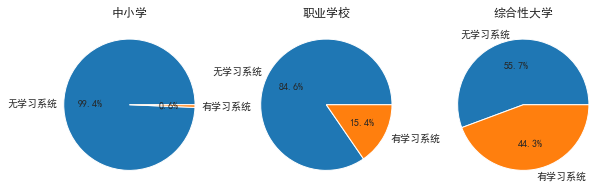

In [84]:
School = [Lms_Education['School']['No'], Lms_Education['School']['Yes']]
College = [Lms_Education['College']['No'], Lms_Education['College']['Yes']]
University = [Lms_Education['University']['No'], Lms_Education['University']['Yes']]

plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.pie(School, labels=['无学习系统', '有学习系统'], autopct='%1.1f%%')
plt.title("中小学")

plt.subplot(132)
plt.pie(College, labels=['无学习系统', '有学习系统'], autopct='%1.1f%%')
plt.title("职业学校")

plt.subplot(133)
plt.pie(University, labels=['无学习系统', '有学习系统'], autopct='%1.1f%%')
plt.title("综合性大学")
plt.show()

从中可见综合性大学中有学习系统的占大多数，中小学几乎没有这样的系统。
但是这里的数据结果有一些矛盾之处
- 中小学生网课高适应性比例与综合性大学接近，且低适应性比例要小于综合性大学
- 有学习系统的学生网课高适应性比例较大，低适应性比例较小

这与图中所示的结果相悖。所以在这里对于数据可能出现的问题作出分析
- 有学习系统的被调查者较少，所以对于学习系统的分析较不精准
- 被调查者可能来自与同一所学校，所以在学习系统这一数据上有重复数据，使得结果不准确。

当然，这样的数据我们也可以做出一些猜测性的分析。在中小学中，属于学校自己的学习系统普及率较低。
对于中小学和大学生来说，学习系统虽然不是主要的影响因素，但是从比例差异来看，中小学生可以考虑设计自己的一套学习系统。

## (5) 控制年龄段进行分析

对于不同年龄段的学生应采用不同的教育方式，所以学生在不同年龄段下的各项指标是教育学中重要的研究题目。接下来，将通过控制学生学习层次来分析不同的因素产生的影响，在这里，我们也将提出一些针对不同学历和年龄段的建议。在分析的过程中，仅考虑中小学和综合性大学。

In [85]:
data3 = data.groupby(['Education Level', 'Adaptivity Level', 'Gender'])['Gender'].count()
data3

Education Level  Adaptivity Level  Gender
College          High              Girl        3
                 Low               Boy        34
                                   Girl       57
                 Moderate          Boy        42
                                   Girl       52
School           High              Boy        27
                                   Girl       20
                 Low               Boy        63
                                   Girl       55
                 Moderate          Boy       141
                                   Girl      160
University       High              Boy        44
                                   Girl        6
                 Low               Boy        71
                                   Girl       56
                 Moderate          Boy       154
                                   Girl       66
Name: Gender, dtype: int64

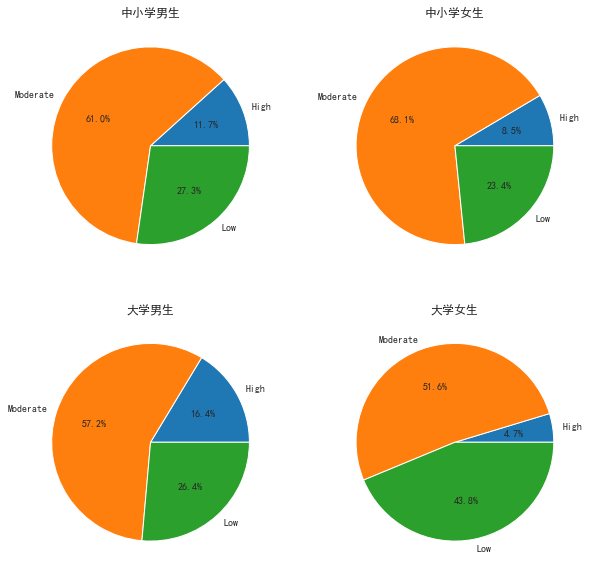

In [86]:
plt.figure(figsize=(10, 10))
school_boy = [data3['School']['High']['Boy'], data3['School']['Moderate']['Boy'], data3['School']['Low']['Boy']]
school_girl = [data3['School']['High']['Girl'], data3['School']['Moderate']['Girl'], data3['School']['Low']['Girl']]


plt.subplot(221)
plt.pie(school_boy, labels=Order, autopct='%1.1f%%')
plt.title("中小学男生")

plt.subplot(222)
plt.pie(school_girl, labels=Order, autopct='%1.1f%%')
plt.title("中小学女生")

university_boy = [data3['University']['High']['Boy'], data3['University']['Moderate']['Boy'], data3['University']['Low']['Boy']]
university_girl = [data3['University']['High']['Girl'], data3['University']['Moderate']['Girl'], data3['University']['Low']['Girl']]

plt.subplot(223)
plt.pie(university_boy, labels=Order, autopct='%1.1f%%')
plt.title("大学男生")

plt.subplot(224)
plt.pie(university_girl, labels=Order, autopct='%1.1f%%')
plt.title("大学女生")


plt.show()

在性别方面，总体来看男生对网课适应程度较高。

In [87]:
data4 = data.groupby(['Education Level', 'Adaptivity Level', 'Institution Type'])['Institution Type'].count()
data4

Education Level  Adaptivity Level  Institution Type
College          High              Non Government        3
                 Low               Government           47
                                   Non Government       44
                 Moderate          Government           51
                                   Non Government       43
School           High              Government            8
                                   Non Government       39
                 Low               Government           23
                                   Non Government       95
                 Moderate          Government           37
                                   Non Government      264
University       High              Government           12
                                   Non Government       38
                 Low               Government           62
                                   Non Government       65
                 Moderate          Government           34
    

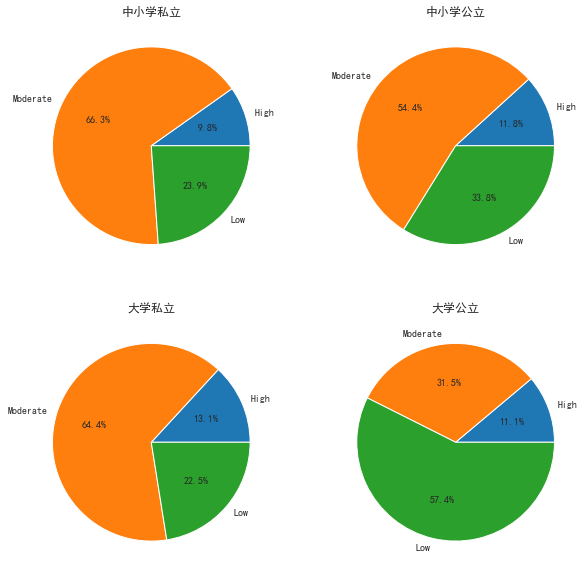

In [88]:
plt.figure(figsize=(10, 10))
school_ngov = [data4['School']['High']['Non Government'], data4['School']['Moderate']['Non Government'], data4['School']['Low']['Non Government']]
school_gov = [data4['School']['High']['Government'], data4['School']['Moderate']['Government'], data4['School']['Low']['Government']]


plt.subplot(221)
plt.pie(school_ngov, labels=Order, autopct='%1.1f%%')
plt.title("中小学私立")

plt.subplot(222)
plt.pie(school_gov, labels=Order, autopct='%1.1f%%')
plt.title("中小学公立")

university_ngov = [data4['University']['High']['Non Government'], data4['University']['Moderate']['Non Government'], data4['University']['Low']['Non Government']]
university_gov = [data4['University']['High']['Government'], data4['University']['Moderate']['Government'], data4['University']['Low']['Government']]

plt.subplot(223)
plt.pie(university_ngov, labels=Order, autopct='%1.1f%%')
plt.title("大学私立")

plt.subplot(224)
plt.pie(university_gov, labels=Order, autopct='%1.1f%%')
plt.title("大学公立")


plt.show()

在两个学历层次中，公立学校总体适应程度较低。与总体情况一致。但是对于中小学生来说，相对于大学生，这一差距并不明显。

In [89]:
data5 = data.groupby(['Education Level', 'Adaptivity Level', 'Location'])['Location'].count()
data5

Education Level  Adaptivity Level  Location
College          High              Yes           3
                 Low               No           49
                                   Yes          42
                 Moderate          No           18
                                   Yes          76
School           High              No            2
                                   Yes          45
                 Low               No           11
                                   Yes         107
                 Moderate          No            2
                                   Yes         299
University       High              No            6
                                   Yes          44
                 Low               No           34
                                   Yes          93
                 Moderate          No           63
                                   Yes         157
Name: Location, dtype: int64

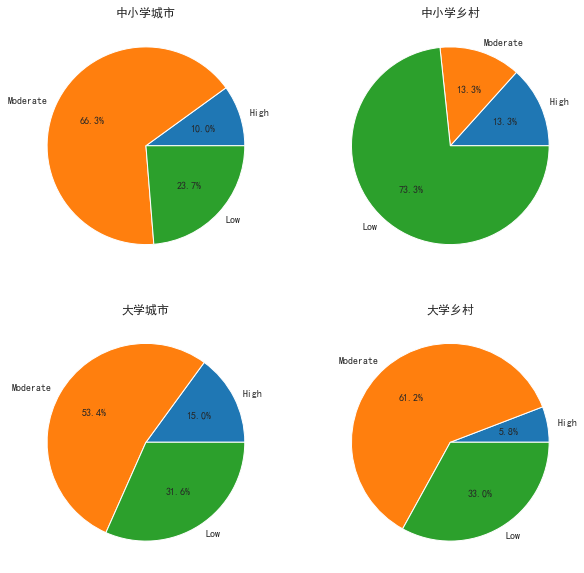

In [90]:
plt.figure(figsize=(10, 10))
school_city = [data5['School']['High']['Yes'], data5['School']['Moderate']['Yes'], data5['School']['Low']['Yes']]
school_rural = [data5['School']['High']['No'], data5['School']['Moderate']['No'], data5['School']['Low']['No']]


plt.subplot(221)
plt.pie(school_city, labels=Order, autopct='%1.1f%%')
plt.title("中小学城市")

plt.subplot(222)
plt.pie(school_rural, labels=Order, autopct='%1.1f%%')
plt.title("中小学乡村")

university_city = [data5['University']['High']['Yes'], data5['University']['Moderate']['Yes'], data5['University']['Low']['Yes']]
university_rural = [data5['University']['High']['No'], data5['University']['Moderate']['No'], data5['University']['Low']['No']]

plt.subplot(223)
plt.pie(university_city, labels=Order, autopct='%1.1f%%')
plt.title("大学城市")

plt.subplot(224)
plt.pie(university_rural, labels=Order, autopct='%1.1f%%')
plt.title("大学乡村")


plt.show()

从以上饼图中可以看出对于中小学生来说，城乡差距产生的影响更为显著，从这里更能反映出城乡差距缩小的重要性，尤其是对中小学生的教育产生的影响。
另外，不管是什么学习阶段，城市总体学习适应性都要高于乡村。

In [ ]:
data6 = data.groupby(['Education Level', 'Adaptivity Level', 'Financial Condition'])['Financial Condition'].count()
data6

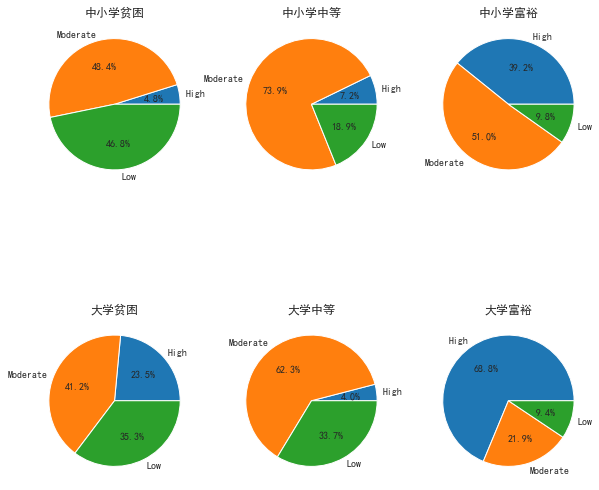

In [92]:
plt.figure(figsize=(10, 10))
school_poor = [data6['School']['High']['Poor'], data6['School']['Moderate']['Poor'], data6['School']['Low']['Poor']]
school_mid = [data6['School']['High']['Mid'], data6['School']['Moderate']['Mid'], data6['School']['Low']['Mid']]
school_rich = [data6['School']['High']['Rich'], data6['School']['Moderate']['Rich'], data6['School']['Low']['Rich']]


plt.subplot(231)
plt.pie(school_poor, labels=Order, autopct='%1.1f%%')
plt.title("中小学贫困")

plt.subplot(232)
plt.pie(school_mid, labels=Order, autopct='%1.1f%%')
plt.title("中小学中等")

plt.subplot(233)
plt.pie(school_rich, labels=Order, autopct='%1.1f%%')
plt.title("中小学富裕")

university_poor = [data6['University']['High']['Poor'], data6['University']['Moderate']['Poor'], data6['University']['Low']['Poor']]
university_mid = [data6['University']['High']['Mid'], data6['University']['Moderate']['Mid'], data6['University']['Low']['Mid']]
university_rich = [data6['University']['High']['Rich'], data6['University']['Moderate']['Rich'], data6['University']['Low']['Rich']]

plt.subplot(234)
plt.pie(university_poor, labels=Order, autopct='%1.1f%%')
plt.title("大学贫困")

plt.subplot(235)
plt.pie(university_mid, labels=Order, autopct='%1.1f%%')
plt.title("大学中等")

plt.subplot(236)
plt.pie(university_rich, labels=Order, autopct='%1.1f%%')
plt.title("大学富裕")


plt.show()

对于中小学生来说，家庭经济情况产生的影响也是非常显著的。
但是我们也可以看到大学生中较为贫困的学生中也可以有较高比例的高适应，可以看出随着年龄的增长，学识的增长，学生会逐渐适应外部环境，调整自己。

In [93]:
data7 = data.groupby(['Education Level', 'Adaptivity Level', 'Internet Type'])['Internet Type'].count()
data7

Education Level  Adaptivity Level  Internet Type
College          High              Wifi               3
                 Low               Mobile Data       41
                                   Wifi              50
                 Moderate          Mobile Data       31
                                   Wifi              63
School           High              Mobile Data       24
                                   Wifi              23
                 Low               Mobile Data       83
                                   Wifi              35
                 Moderate          Mobile Data      241
                                   Wifi              60
University       High              Mobile Data       12
                                   Wifi              38
                 Low               Mobile Data       59
                                   Wifi              68
                 Moderate          Mobile Data       95
                                   Wifi             125

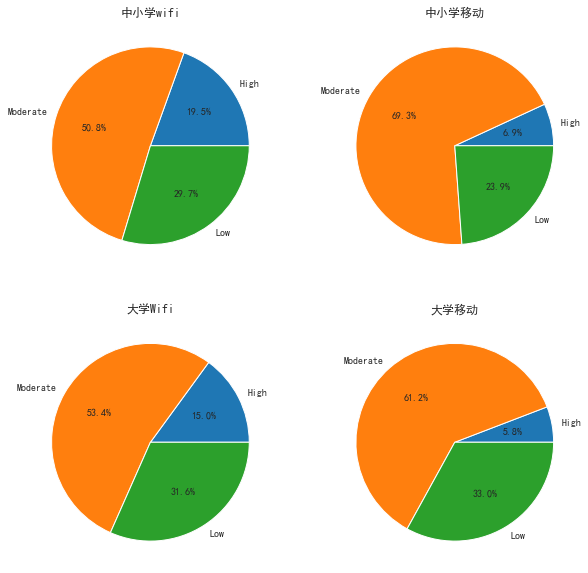

In [94]:
plt.figure(figsize=(10, 10))
school_wifi = [data7['School']['High']['Wifi'], data7['School']['Moderate']['Wifi'], data7['School']['Low']['Wifi']]
school_data = [data7['School']['High']['Mobile Data'], data7['School']['Moderate']['Mobile Data'], data7['School']['Low']['Mobile Data']]


plt.subplot(221)
plt.pie(school_wifi, labels=Order, autopct='%1.1f%%')
plt.title("中小学wifi")

plt.subplot(222)
plt.pie(school_data, labels=Order, autopct='%1.1f%%')
plt.title("中小学移动")

university_wifi = [data7['University']['High']['Wifi'], data7['University']['Moderate']['Wifi'], data7['University']['Low']['Wifi']]
university_data = [data7['University']['High']['Mobile Data'], data7['University']['Moderate']['Mobile Data'], data7['University']['Low']['Mobile Data']]

plt.subplot(223)
plt.pie(university_city, labels=Order, autopct='%1.1f%%')
plt.title("大学Wifi")

plt.subplot(224)
plt.pie(university_rural, labels=Order, autopct='%1.1f%%')
plt.title("大学移动")


plt.show()

从网络连接来看，中小学生与大学生接近。

In [95]:
data8 = data.groupby(['Education Level', 'Adaptivity Level', 'Network Type'])['Network Type'].count()
data8

Education Level  Adaptivity Level  Network Type
College          High              4G                3
                 Low               2G                3
                                   3G               22
                                   4G               66
                 Moderate          3G               23
                                   4G               71
School           High              3G               16
                                   4G               31
                 Low               2G                5
                                   3G               69
                                   4G               44
                 Moderate          3G               92
                                   4G              209
University       High              3G                6
                                   4G               44
                 Low               2G                6
                                   3G               52
                 

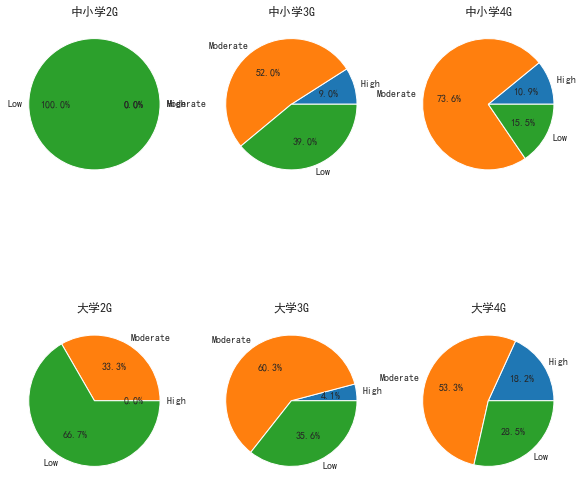

In [96]:
plt.figure(figsize=(10, 10))
school_2 = [0, 0, data8['School']['Low']['2G']]
school_3 = [data8['School']['High']['3G'], data8['School']['Moderate']['3G'], data8['School']['Low']['3G']]
school_4 = [data8['School']['High']['4G'], data8['School']['Moderate']['4G'], data8['School']['Low']['4G']]


plt.subplot(231)
plt.pie(school_2, labels=Order, autopct='%1.1f%%')
plt.title("中小学2G")

plt.subplot(232)
plt.pie(school_3, labels=Order, autopct='%1.1f%%')
plt.title("中小学3G")

plt.subplot(233)
plt.pie(school_4, labels=Order, autopct='%1.1f%%')
plt.title("中小学4G")

university_2 = [0, data8['University']['Moderate']['2G'], data8['University']['Low']['2G']]
university_3 = [data8['University']['High']['3G'], data8['University']['Moderate']['3G'], data8['University']['Low']['3G']]
university_4 = [data8['University']['High']['4G'], data8['University']['Moderate']['4G'], data8['University']['Low']['4G']]

plt.subplot(234)
plt.pie(university_2, labels=Order, autopct='%1.1f%%')
plt.title("大学2G")

plt.subplot(235)
plt.pie(university_3, labels=Order, autopct='%1.1f%%')
plt.title("大学3G")

plt.subplot(236)
plt.pie(university_4, labels=Order, autopct='%1.1f%%')
plt.title("大学4G")


plt.show()

在网络类型方面，中小学生与大学生也较为接近。

In [97]:
data9 = data.groupby(['Education Level', 'Adaptivity Level', 'Class Duration'])['Class Duration'].count()
data9

Education Level  Adaptivity Level  Class Duration
College          High              3-6                 3
                 Low               1-3                85
                                   3-6                 6
                 Moderate          1-3                65
                                   3-6                29
School           High              1-3                43
                                   3-6                 4
                 Low               1-3               118
                 Moderate          1-3               288
                                   3-6                13
University       High              1-3                39
                                   3-6                11
                 Low               1-3                87
                                   3-6                40
                 Moderate          1-3               115
                                   3-6               105
Name: Class Duration, dtype: int64

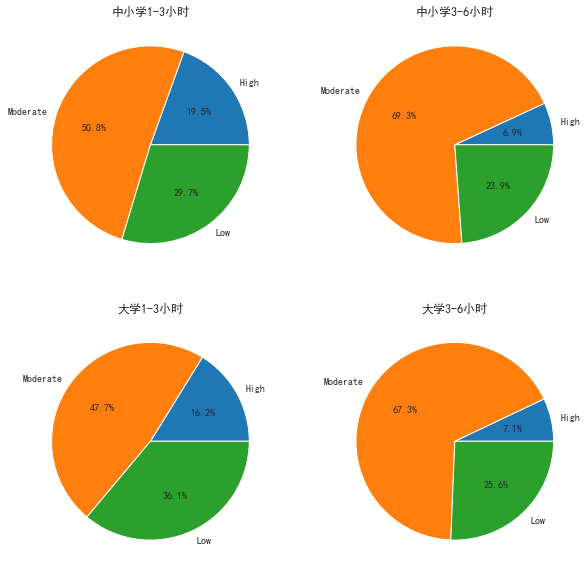

In [98]:
plt.figure(figsize=(10, 10))
school_13 = [data9['School']['High']['1-3'], data9['School']['Moderate']['1-3'], data9['School']['Low']['1-3']]
school_36 = [data9['School']['High']['3-6'], data9['School']['Moderate']['3-6'], 0]


plt.subplot(221)
plt.pie(school_wifi, labels=Order, autopct='%1.1f%%')
plt.title("中小学1-3小时")

plt.subplot(222)
plt.pie(school_data, labels=Order, autopct='%1.1f%%')
plt.title("中小学3-6小时")

university_13 = [data9['University']['High']['1-3'], data9['University']['Moderate']['1-3'], data9['University']['Low']['1-3']]
university_36 = [data9['University']['High']['3-6'], data9['University']['Moderate']['3-6'], data9['University']['Low']['3-6']]

plt.subplot(223)
plt.pie(university_13, labels=Order, autopct='%1.1f%%')
plt.title("大学1-3小时")

plt.subplot(224)
plt.pie(university_36, labels=Order, autopct='%1.1f%%')
plt.title("大学3-6小时")


plt.show()

在上课时长来看，中小学生与大学生也较为接近。但是从低适应性比例来看，大学生比例稍大，可以看出大学生相比于中小学生略微”沉不住气“。

In [99]:
data10 = data.groupby(['Education Level', 'Adaptivity Level', 'Self Lms'])['Self Lms'].count()
data10

Education Level  Adaptivity Level  Self Lms
College          High              No            3
                 Low               No           77
                                   Yes          14
                 Moderate          No           79
                                   Yes          15
School           High              No           47
                 Low               No          115
                                   Yes           3
                 Moderate          No          301
University       High              No           20
                                   Yes          30
                 Low               No           94
                                   Yes          33
                 Moderate          No          107
                                   Yes         113
Name: Self Lms, dtype: int64

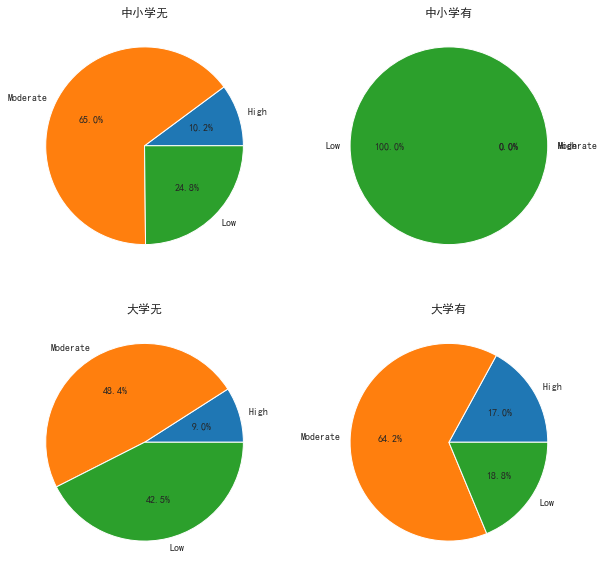

In [100]:
plt.figure(figsize=(10, 10))
school_no = [data10['School']['High']['No'], data10['School']['Moderate']['No'], data10['School']['Low']['No']]
school_yes = [0, 0, data10['School']['Low']['Yes']]


plt.subplot(221)
plt.pie(school_no, labels=Order, autopct='%1.1f%%')
plt.title("中小学无")

plt.subplot(222)
plt.pie(school_yes, labels=Order, autopct='%1.1f%%')
plt.title("中小学有")

university_no = [data10['University']['High']['No'], data10['University']['Moderate']['No'], data10['University']['Low']['No']]
university_yes = [data10['University']['High']['Yes'], data10['University']['Moderate']['Yes'], data10['University']['Low']['Yes']]

plt.subplot(223)
plt.pie(university_no, labels=Order, autopct='%1.1f%%')
plt.title("大学无")

plt.subplot(224)
plt.pie(university_yes, labels=Order, autopct='%1.1f%%')
plt.title("大学有")


plt.show()

有学习系统的数据量过少，所以结果较为极端，不做分析。

根据之前的分析，经济因素以及网络因素是影响学生网课适应程度的两大重要原因。
另外，学校是否为公立，学生是否是计算机相关的学生也会有一定程度的影响。
而对于Lms这一因素来说，由于总体来看lms的推广程度较低，所以收集到的数据较少，不能得出准确的结论。